In [6]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncAwayS[survey$IncAwayS==99] = NA;
data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))
#tmp <- cbind(INT1=data1$INT1,INT2=data1$INT2,INT3=data1$INT3)
#data1$INT <- rowMeans(tmp)
table(data1$IncHomeS)
table(data1$IncAwayS)
table(data1$IncWD)
table(data1$INT)

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwayW"       "BillS"      
 [11] "BillW"       "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"    
 [16] "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"  
 [21] "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"     
 [26] "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"    
 [31] "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"     
 [36] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HabitC"     
 [41] "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"    
 [46] "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"    
 [51] "HabitG"      "HomeS"       "HomeW"       "HouseholdS"  "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S" 
 [61] "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"   
 [66] "Income"      "IncWD"       "INT"         "INT1"        "INT2"       
 [71] "INT3"        "INT4"        "Latitude"    "MC"          "MC1"        
 [76] "MC2"         "MC3"         "MC4"         "MC5"         "OwnRent"    
 [81] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [86] "PBC5"        "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm" 
 [91] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [96] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
[101] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[106] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[111] "Winter_avgC" "Winter_avgF" "X.9to5"


  1   2   3   4   5   6   7   8 
 75  57 145 253  66  68  57  42 


  1   2   3   4   5   6   7   8 
 83  53  83 173 103  84 103  77 


  1   2   3   4   5   6   7 
 59  49  76 159  50 195 140 


               1 1.66666666666667                2 2.33333333333333 
               2                3                7                8 
2.66666666666667                3 3.33333333333333 3.66666666666667 
               8               16               19               27 
               4 4.33333333333333 4.66666666666667                5 
              54               43               65              101 
5.33333333333333 5.66666666666667                6 6.33333333333333 
              80               79              159               45 
6.66666666666667                7 
              19               90 

In [14]:
summary(data1$Age)
sd(data1$Age, na.rm = TRUE)

summary(data1$OwnRent)
sd(data1$OwnRent, na.rm = TRUE)

summary(data1$SqftCate)
sd(data1$SqftCate, na.rm = TRUE)

summary(data1$Income)
sd(data1$Income, na.rm = TRUE)

summary(data1$Educ)
sd(data1$Educ, na.rm = TRUE)

summary(data1$EnergyC)
sd(data1$EnergyC, na.rm = TRUE)

summary(data1$Attitude)
sd(data1$Attitude, na.rm = TRUE)

summary(data1$PBC)
sd(data1$PBC, na.rm = TRUE)

summary(data1$MC)
sd(data1$MC, na.rm = TRUE)

summary(data1$ComfNS)
sd(data1$ComfNS, na.rm = TRUE)

summary(data1$SubNorm)
sd(data1$SubNorm, na.rm = TRUE)

summary(data1$HabitC)
sd(data1$HabitC, na.rm = TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
     18      26      32      35      43      72       4 

[1] 11

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.0     1.0     1.5     2.0     4.0       2 

[1] 0.52

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     1.8     2.0     2.5     4.0     4.0       2 

[1] 1.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     4.0     5.0     5.2     7.0    10.0       5 

[1] 2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     2.0     4.0     3.4     4.0     6.0       7 

[1] 1.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.3     5.3     5.2     6.0     7.0 

[1] 1.4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     5.5     6.2     6.0     7.0     7.0 

[1] 1.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.5     5.0     5.8     5.7     6.2     7.0       1 

[1] 0.95

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     5.0     5.7     5.6     6.3     7.0 

[1] 1.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     4.0     5.0     4.9     6.0     7.0 

[1] 1.6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     3.9     4.7     7.0 

[1] 1.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    1.0     4.0     5.0     5.1     6.3     8.0       1 

[1] 1.5

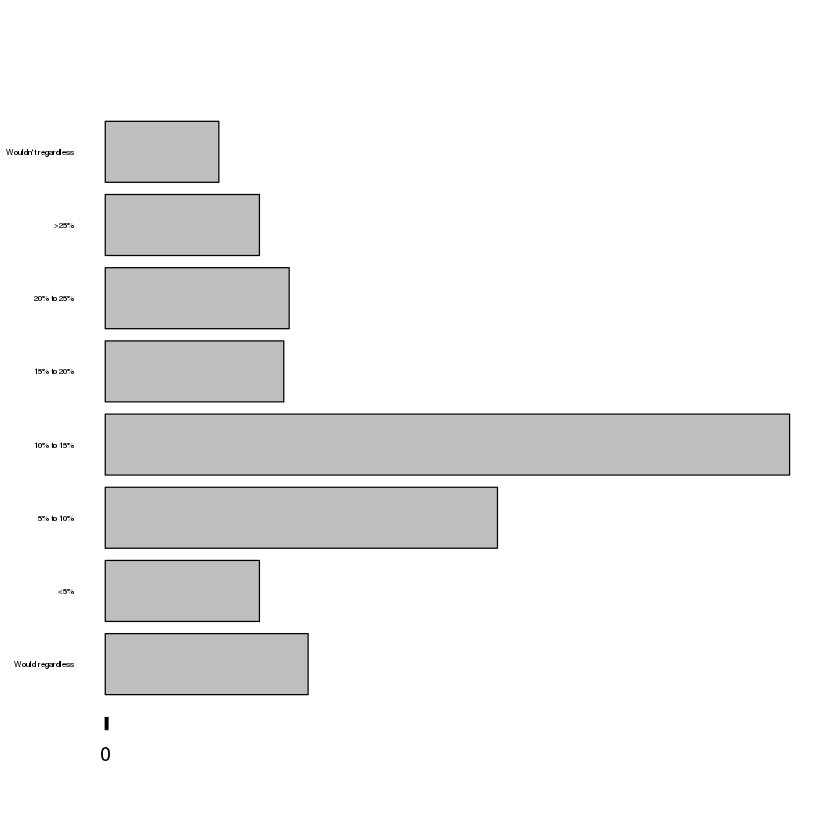

In [5]:
par(las=2)
returns <- runif(10)
barplot(table(data1$IncHomeS),names.arg=c("Would regardless","<5%","5% to 10%","10% to 15%","15% to 20%","20% to 25%",">25%","Wouldn't regardless"),horiz=TRUE,cex.names=0.4)

In [34]:
png('graphs/summer_home_hor.png')
par(las=2)
barplot(table(data1$IncHomeS),,names.arg=c("Would regardless","<5%","5% to 10%","10% to 15%","15% to 20%","20% to 25%",">25%","Wouldn't regardless"),horiz=TRUE,cex.names=0.4)
dev.off()

png('graphs/summer_away_hor.png')
par(las=2)
barplot(table(data1$IncAwayS),names.arg=c("Would regardless","<5%","5% to 10%","10% to 15%","15% to 20%","20% to 25%",">25%","Wouldn't regardless"),horiz=TRUE,cex.names=0.4)
dev.off()

png('graphs/washer_dryer_hor.png')
par(las=2)
barplot(table(data1$IncWD),names.arg=c("Would Regardless","<3%","3% to 5%","5% to 7%","7% to 10%",">10%","Wouldn't regardless"),horiz=TRUE,cex.names=0.4)
dev.off()

png('graphs/intentions_hor.png')
par(las=2)
barplot(table(data1$INT), axes=FALSE, horiz=TRUE)
dev.off()

#png('graphs/PBC.png')
#barplot(table(data1$PBC), horiz=TRUE, main="Perceived behavioral control")
#dev.off()

#png('graphs/attitude.png')
#barplot(table(data1$Atti), horiz=TRUE, main="Attitude towards energy saving")
#dev.off()

#png('graphs/subnorm.png')
#barplot(table(data1$SubNorm), horiz=TRUE, main="Subjective norm")
#dev.off()

#png('graphs/energyc.png')
#barplot(table(data1$EnergyC), horiz=TRUE, main="Energy environmental concern")
#dev.off()

#png('graphs/moneyc.png')
#barplot(table(data1$MC), horiz=TRUE, main="Electricity cost concern")
#dev.off()

#png('graphs/habitc.png')
#barplot(table(data1$HabitC), horiz=TRUE, main="Energy saving habits")
#dev.off()

#png('graphs/comfort_needs.png')
#barplot(table(data1$ComfNS), horiz=TRUE, main="Comfort needs")
#dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

In [53]:
#IncHomeS, IncAwayS, IncWD, Age, Income, Educ, OwnRent, SqftCate, EnergyC, MC, ComfNS, HabitC, PBC, SubNorm, Attitude
model <- data1[,which(names(data1) %in% c("Age","Income","Educ","OwnRent","SqftCate",
                                         "EnergyC","MC","ComfNS","HabitC","PBC","SubNorm","Attitude"))]
#model

for (n in names(model)){
    nmis = sum(is.na(model[,n]))
    if(nmis >1)  print (c(n, sum(is.na(model[,n]))))
}
    
model <- na.omit(model)

for (n in names(model)){
    nmis = sum(is.na(model[,n]))
    if(nmis >1)  print (c(n, sum(is.na(model[,n]))))
}

[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "SqftCate" "2"       
[1] "Income" "5"     
[1] "Educ" "7"   


In [65]:
#?cor
#?cor.test
#cor.test(model)
#install.packages("Hmisc")
library(Hmisc)
rcorr(as.matrix(model),type="pearson")

           Age OwnRent SqftCate Income  Educ EnergyC Attitude   PBC    MC
Age       1.00    0.37     0.28   0.18  0.15   -0.02     0.07  0.04  0.06
OwnRent   0.37    1.00     0.49   0.34  0.07   -0.07    -0.01 -0.01  0.05
SqftCate  0.28    0.49     1.00   0.36  0.01   -0.10    -0.01 -0.06 -0.01
Income    0.18    0.34     0.36   1.00  0.25   -0.10    -0.06 -0.08 -0.04
Educ      0.15    0.07     0.01   0.25  1.00    0.14     0.08  0.00  0.08
EnergyC  -0.02   -0.07    -0.10  -0.10  0.14    1.00     0.57  0.15  0.27
Attitude  0.07   -0.01    -0.01  -0.06  0.08    0.57     1.00  0.27  0.40
PBC       0.04   -0.01    -0.06  -0.08  0.00    0.15     0.27  1.00  0.31
MC        0.06    0.05    -0.01  -0.04  0.08    0.27     0.40  0.31  1.00
ComfNS    0.06    0.01     0.05   0.02 -0.10   -0.18    -0.15  0.03 -0.09
SubNorm  -0.04   -0.06    -0.03  -0.05  0.13    0.34     0.34  0.17  0.25
HabitC    0.04    0.04     0.02   0.01  0.12    0.19     0.24  0.15  0.22
         ComfNS SubNorm HabitC
Age    

In [3]:
tmc<-cor(model)
tcor<-cor(model)
tcor[upper.tri(tmc)]<-""
tmc<-as.data.frame(tcor)
tcor

,Age,OwnRent,SqftCate,Income,Educ,EnergyC,Attitude,PBC,MC,ComfNS,SubNorm,HabitC
Age,1,,,,,,,,,,,
OwnRent,0.368856520179533,1,,,,,,,,,,
SqftCate,0.276071347171836,0.48529586773381,1,,,,,,,,,
Income,0.182583367080747,0.33946424111393,0.355395432359381,1,,,,,,,,
Educ,0.148103348868273,0.0675380268166493,0.00554631386915633,0.247585295183406,1,,,,,,,
EnergyC,-0.0166767759214103,-0.0731261360544894,-0.0955817266084428,-0.0950712242975889,0.14111148126837,1,,,,,,
Attitude,0.0717658588757512,-0.00760035794887058,-0.0136660797590906,-0.0609810391288798,0.0837651462693148,0.571150502415223,1,,,,,
PBC,0.042106895110817,-0.0110792565609716,-0.0630783195997467,-0.0788717463400438,-0.00251027279341048,0.152716525451614,0.273626064521451,1,,,,
MC,0.0562332512013021,0.0477316892342926,-0.0107820516034209,-0.0436178488816162,0.0786491720521455,0.273769491753221,0.404691826422637,0.311123536792911,1,,,
ComfNS,0.0600530200970348,0.012508565767688,0.0484914178883823,0.0207733329098668,-0.0970267740202454,-0.179640106877824,-0.147079801656012,0.0253896018737507,-0.0881773576840549,1,,


In [4]:
#install.packages("corrplot",lib="../Rpackages")
library(corrplot,lib.loc="../Rpackages")
jpeg("cor.jpeg")
corrplot(tcor, type="upper",method="number")
dev.off()

ERROR: Error in corrplot(tcor, type = "upper", method = "number"): The matrix is not in [-1, 1]!


In [5]:
#install.packages("xtable",lib="../Rpackages")
library(xtable,lib.loc="../Rpackages")
print(tcor,type='html')

         Age                   OwnRent                SqftCate             
Age      "1"                   ""                     ""                   
OwnRent  "0.368856520179533"   "1"                    ""                   
SqftCate "0.276071347171836"   "0.48529586773381"     "1"                  
Income   "0.182583367080747"   "0.33946424111393"     "0.355395432359381"  
Educ     "0.148103348868273"   "0.0675380268166493"   "0.00554631386915633"
EnergyC  "-0.0166767759214103" "-0.0731261360544894"  "-0.0955817266084428"
Attitude "0.0717658588757512"  "-0.00760035794887058" "-0.0136660797590906"
PBC      "0.042106895110817"   "-0.0110792565609716"  "-0.0630783195997467"
MC       "0.0562332512013021"  "0.0477316892342926"   "-0.0107820516034209"
ComfNS   "0.0600530200970348"  "0.012508565767688"    "0.0484914178883823" 
SubNorm  "-0.0390424141554672" "-0.0607622476748242"  "-0.0298064681842728"
HabitC   "0.0424404277981123"  "0.0410949676601935"   "0.0178622750253089" 
         Inc

In [6]:
write.csv(tcor,file="model_cor.csv")

In [7]:
#table(data1$ReasonPos)
jpeg('graphs/ReasonPos_barplot.jpeg')
barplot(table(data1$ReasonPos),main='Reasons for needing no incentive to engage in energy saving')
dev.off()

jpeg('graphs/ReasonNeg_barplot.jpeg')
barplot(table(data1$ReasonNeg),main='Reasons for not engaging in energy saving regardless of incentive')
dev.off()

png 
  2

png 
  2

In [8]:
png('graphs/Incentives.png')
par(mfrow=c(3, 2))
boxplot(data1$IncHomeS,main='IncHomeS')
hist(data1$IncHomeS,main='IncHomeS')
boxplot(data1$IncAwayS,main='IncAwayS')
hist(data1$IncAwayS,main='IncAwayS')
boxplot(data1$IncWD,main='IncWD')
hist(data1$IncWD,main='IncWD')
par(t)
dev.off()

NULL

png 
  2

In [10]:
png('graphs/Consciences.png')
par(mfrow=c(3, 2))

boxplot(data1$EnergyC,main='EnergyC')
hist(data1$EnergyC,main='EnergyC')

boxplot(data1$MC,main='MC')
hist(data1$MC,main='MC')

boxplot(data1$HabitC,main='HabitC')
hist(data1$HabitC,main='HabitC')

par(t)
dev.off()

png('graphs/Comfort_needs.png')
par(mfrow=c(1, 2))

boxplot(data1$ComfNS,main='ComfNS')
hist(data1$ComfNS,main='ComfNS')

par(t)
dev.off()

png('graphs/Intentions.png')
par(mfrow=c(1, 2))

boxplot(data1$INT,main='INT')
hist(data1$INT,main='INT')

par(t)
dev.off()

png('graphs/Social_psychological.png')
par(mfrow=c(3,2))

boxplot(data1$PBC,main='PBC')
hist(data1$PBC,main='PBC')

boxplot(data1$Attitude,main='Attitude')
hist(data1$Attitude,main='Attitude')

boxplot(data1$SubNorm,main='SubNorm')
hist(data1$SubNorm,main='SubNorm')

par(t)
dev.off()

NULL

png 
  2

NULL

png 
  2

NULL

png 
  2

NULL

png 
  2

In [7]:
graphing_function <- function(name,var_name){
    print(table(name))
    
    box_file <- paste(var_name,'boxplot.jpeg',sep="_")
    hist_file <- paste(var_name,'histplot.jpeg',sep="_")
    box_file <- paste('graphs/',box_file,sep="")
    hist_file <- paste('graphs/',hist_file,sep="")
    
    print(box_file)
    print(hist_file)
    
    jpeg(box_file)
    boxplot(name,main=var_name)
    dev.off()
    
    jpeg(hist_file)
    hist(name,main=var_name,xlab=var_name)
    dev.off()
}

In [8]:
graphing_function(data1$IncHomeS,'IncHomeS')

name
  1   2   3   4   5   6   7   8 
 75  57 145 253  66  68  57  42 
[1] "graphs/IncHomeS_boxplot.jpeg"
[1] "graphs/IncHomeS_histplot.jpeg"


png 
  2

In [9]:
data1$IncAwayS[data1$IncAwayS==99] = NA;
#data1 <- na.omit(data1)
graphing_function(data1$IncAwayS,'IncAwayS')

name
  1   2   3   4   5   6   7   8 
 83  53  83 173 103  84 103  77 
[1] "graphs/IncAwayS_boxplot.jpeg"
[1] "graphs/IncAwayS_histplot.jpeg"


png 
  2

In [10]:
graphing_function(data1$IncWD,'IncWD')

name
  1   2   3   4   5   6   7 
 59  49  76 159  50 195 140 
[1] "graphs/IncWD_boxplot.jpeg"
[1] "graphs/IncWD_histplot.jpeg"


png 
  2

In [11]:
graphing_function(data1$Age,'Age')

name
18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
11  9 12 23 35 22 26 42 36 37 37 37 30 29 35 26 24 22 22 21 17 17 16 14 13 15 
44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 63 64 65 66 67 69 72 
14 16 11 11 19 15 11 14  7  8  6 11  4  7 13  7  6  3  1  2  2  2  2  1  1 
[1] "graphs/Age_boxplot.jpeg"
[1] "graphs/Age_histplot.jpeg"


png 
  2

In [12]:
graphing_function(data1$Income,'Income')

name
  1   3   4   5   6   7   8   9  10 
 57  99 116 162 169 108  85  16   9 
[1] "graphs/Income_boxplot.jpeg"
[1] "graphs/Income_histplot.jpeg"


png 
  2

In [13]:
graphing_function(data1$Educ,'Educ')

name
  1   2   3   4   5   6 
  8 208 176 297 103  27 
[1] "graphs/Educ_boxplot.jpeg"
[1] "graphs/Educ_histplot.jpeg"


png 
  2

In [14]:
graphing_function(data1$OwnRent,'OwnRent')

name
  1   2   3   4 
413 406   4   1 
[1] "graphs/OwnRent_boxplot.jpeg"
[1] "graphs/OwnRent_histplot.jpeg"


png 
  2

In [15]:
graphing_function(data1$SqftCate,'SqftCate')

name
  1   2   3   4 
206 213 194 211 
[1] "graphs/SqftCate_boxplot.jpeg"
[1] "graphs/SqftCate_histplot.jpeg"


png 
  2

In [16]:
graphing_function(data1$EnergyC,'EnergyC')

name
               1 1.33333333333333 1.66666666666667                2 
              16                1               10               13 
2.33333333333333 2.66666666666667                3 3.33333333333333 
               6               12               21               27 
3.66666666666667                4 4.33333333333333 4.66666666666667 
              22               44               43               63 
               5 5.33333333333333 5.66666666666667                6 
              94               74               62              133 
6.33333333333333 6.66666666666667                7 
              55               35               95 
[1] "graphs/EnergyC_boxplot.jpeg"
[1] "graphs/EnergyC_histplot.jpeg"


png 
  2

In [17]:
graphing_function(data1$MC,'MC')

name
               1 1.33333333333333                2 2.33333333333333 
               2                1                3                3 
2.66666666666667                3 3.33333333333333 3.66666666666667 
               8               12               14               14 
               4 4.33333333333333 4.66666666666667                5 
              37               27               46              117 
5.33333333333333 5.66666666666667                6 6.33333333333333 
              61               94              134               88 
6.66666666666667                7 
              56              109 
[1] "graphs/MC_boxplot.jpeg"
[1] "graphs/MC_histplot.jpeg"


png 
  2

In [18]:
graphing_function(data1$ComfNS,'ComfNS')

name
               1 1.33333333333333 1.66666666666667                2 
              27                3               20               29 
2.33333333333333 2.66666666666667                3 3.33333333333333 
              13               19               30               28 
3.66666666666667                4 4.33333333333333 4.66666666666667 
              28               56               59               53 
               5 5.33333333333333 5.66666666666667                6 
              49               59               56              107 
6.33333333333333 6.66666666666667                7 
              48               42              100 
[1] "graphs/ComfNS_boxplot.jpeg"
[1] "graphs/ComfNS_histplot.jpeg"


png 
  2

In [19]:
graphing_function(data1$HabitC,'HabitC')

name
               1 1.33333333333333 1.66666666666667                2 
              12                6                6                8 
2.33333333333333 2.66666666666667                3 3.33333333333333 
              16               10               37               32 
3.66666666666667                4 4.33333333333333 4.66666666666667 
              39               45               66               72 
               5 5.33333333333333 5.66666666666667                6 
              72               62               55               59 
6.33333333333333 6.66666666666667                7 7.33333333333333 
              53               47               85               23 
7.66666666666667                8 
               4               16 
[1] "graphs/HabitC_boxplot.jpeg"
[1] "graphs/HabitC_histplot.jpeg"


png 
  2

In [20]:
graphing_function(data1$PBC,'PBC')

name
 2.5 2.75    3 3.25  3.5 3.75    4 4.25  4.5 4.75    5 5.25  5.5 5.75    6 6.25 
   1    2    4    6   10   12   28   24   32   37   73   75   68   69  138   55 
 6.5 6.75    7 
  35   44  112 
[1] "graphs/PBC_boxplot.jpeg"
[1] "graphs/PBC_histplot.jpeg"


png 
  2

In [21]:
graphing_function(data1$SubNorm,'SubNorm')

name
               1 1.33333333333333 1.66666666666667                2 
              30               10               14               45 
2.33333333333333 2.66666666666667                3 3.33333333333333 
              29               47               52               58 
3.66666666666667                4 4.33333333333333 4.66666666666667 
              61              116               75               85 
               5 5.33333333333333 5.66666666666667                6 
              63               49               28               35 
6.33333333333333 6.66666666666667                7 
               7                5               17 
[1] "graphs/SubNorm_boxplot.jpeg"
[1] "graphs/SubNorm_histplot.jpeg"


png 
  2

In [22]:
graphing_function(data1$Attitude,'Attitude')

name
   1  1.5    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 4.25  4.5 4.75    5 5.25 
   3    1    2    4    1    1    9    2    7    6   21   10   16   29   49   24 
 5.5 5.75    6 6.25  6.5 6.75    7 
  50   37  128   50   47   26  303 
[1] "graphs/Attitude_boxplot.jpeg"
[1] "graphs/Attitude_histplot.jpeg"


png 
  2